In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('../../0 data preparation/All.csv')
df_dropduplicates=df.drop_duplicates(subset='ID')

### 1. Family distribution

In [3]:
df_family=df['Family'].value_counts()
df_family=pd.DataFrame(df_family)
df_family.reset_index(inplace=True)
df_family.rename(columns={'index':'Family','Family':'Counts'},inplace=True)
data=[]
for i in range(len(df_family)):
    family=df_family['Family'][i]
    compounds=df[df['Family']==family]
    compounds_dropduplicates=compounds.drop_duplicates(subset='ID')
    percentages=round(len(compounds_dropduplicates)/len(df_dropduplicates)*100,2)
    min_content=min(compounds['Content(%)'])
    max_content=max(compounds['Content(%)'])
    mean_content=np.mean(compounds['Content(%)'])
    median_content=np.median(compounds['Content(%)'])
    data.append((family,len(compounds_dropduplicates),percentages,min_content,max_content,mean_content,median_content,str(min_content)+'~'+str(max_content)))
data=pd.DataFrame(data,columns=['Family','Counts','Percentages(%)','Min','Max','Mean','Median','Content(%)'])
data = data.sort_values('Counts', ascending=False)
data.reset_index(drop=True,inplace=True)
data.to_csv('Family.csv',index=False)
data

,Family,Counts,Percentages(%),Min,Max,Mean,Median,Content(%)
0,Asteraceae,979,15.34,0.000001,2.600000,0.010121,0.000600,1e-06~2.6
1,Ranunculaceae,620,9.71,0.000002,0.240000,0.003727,0.000491,2e-06~0.24
2,Fabaceae,382,5.98,0.000003,1.500000,0.014411,0.000590,3e-06~1.5
3,Lamiaceae,342,5.36,0.000003,0.320000,0.004302,0.000273,3e-06~0.32
4,Apocynaceae,334,5.23,0.000001,0.255556,0.002844,0.000242,1e-06~0.255556
...,...,...,...,...,...,...,...,...
151,Alismataceae,1,0.02,0.000100,0.000100,0.000100,0.000100,0.0001~0.0001
152,Lepidolaenaceae,1,0.02,0.018898,0.018898,0.018898,0.018898,0.018898~0.018898
153,Loasaceae,1,0.02,0.000292,0.000292,0.000292,0.000292,0.000292~0.000292
154,Betulaceae,1,0.02,0.833333,0.900000,0.866667,0.866667,0.833333~0.9


### Barplot (Counts≥100)

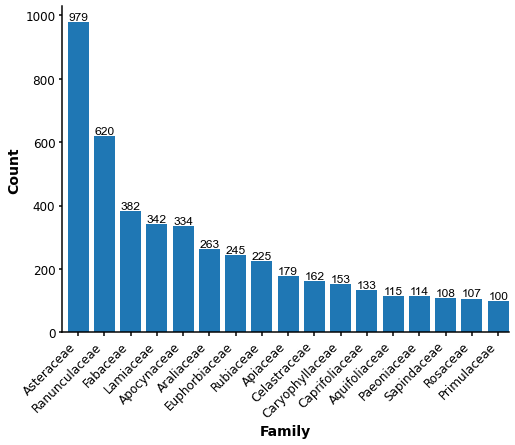

In [4]:
# Families with more than 100 compounds
data=data[data['Counts']>=100]
plt.figure(figsize=(8, 6))
bars = plt.bar(data['Family'], data['Counts'])
plt.xlabel('Family', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.rcParams['font.family'] = 'Arial'
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().spines['top'].set_linewidth(0)
plt.tick_params(width=1.5)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-0.6, len(data['Family']) - 0.6)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=12)
plt.savefig('bar_family.tif', dpi=600, bbox_inches='tight')
plt.show()


### 2. Species distribution

In [5]:
df_scientific=df['Specie'].value_counts()
df_scientific=pd.DataFrame(df_scientific)
df_scientific.reset_index(inplace=True)
df_scientific.rename(columns={'index':'Specie','Specie':'Counts'},inplace=True)
data=[]
for i in range(len(df_scientific)):
    scientific=df_scientific['Specie'][i]
    compounds=df[df['Specie']==scientific]
    compounds_dropduplicates=compounds.drop_duplicates(subset='ID')
    percentages=round(len(compounds_dropduplicates)/len(df_dropduplicates)*100,2)
    min_content=min(compounds['Content(%)'])
    max_content=max(compounds['Content(%)'])
    mean_content=np.mean(compounds['Content(%)'])
    median_content=np.median(compounds['Content(%)'])
    data.append((scientific,len(compounds_dropduplicates),percentages,min_content,max_content,mean_content,median_content,str(min_content)+'~'+str(max_content)))
data=pd.DataFrame(data,columns=['Specie','Counts','Percentages(%)','Min','Max','Mean','Median','Contents'])
data = data.sort_values('Counts', ascending=False)
data.reset_index(drop=True,inplace=True)
data.to_csv('Specie.csv',index=False)
data

,Specie,Counts,Percentages(%),Min,Max,Mean,Median,Contents
0,Panax ginseng,59,0.92,0.000140,0.189000,0.006406,0.001000,0.00014~0.189
1,Uncaria rhynchophylla,51,0.80,0.000002,0.001459,0.000164,0.000044,2e-06~0.001459
2,Paeonia lactiflora,49,0.77,0.000006,0.064000,0.003950,0.000277,6e-06~0.064
3,Alstonia scholaris,42,0.66,0.000018,0.038000,0.002564,0.000309,1.8e-05~0.038
4,Tripterygium wilfordii,36,0.56,0.000002,0.000350,0.000035,0.000012,2e-06~0.00035
...,...,...,...,...,...,...,...,...
1249,Centaurea ragusina,1,0.02,0.001578,0.001578,0.001578,0.001578,0.001578~0.001578
1250,Ferula kuhistanica,1,0.02,0.001600,0.001600,0.001600,0.001600,0.0016~0.0016
1251,Acacia cyclops,1,0.02,0.020354,0.020354,0.020354,0.020354,0.020354~0.020354
1252,Strychnos trinervis,1,0.02,0.017808,0.017808,0.017808,0.017808,0.017808~0.017808


### Barplot (Counts>=28)

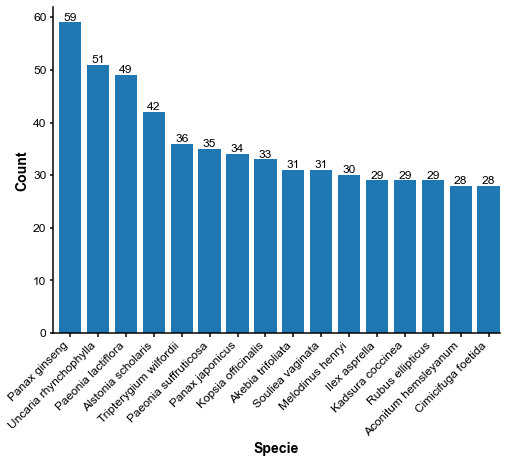

In [6]:
# Families with more than 28 compounds
data=data[data['Counts']>=28]
plt.figure(figsize=(8, 6))
bars = plt.bar(data['Specie'], data['Counts'])
plt.xlabel('Specie', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.rcParams['font.family'] = 'Arial'
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().spines['top'].set_linewidth(0)
plt.tick_params(width=1.5)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-0.6, len(data['Specie']) - 0.6)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=12)
plt.savefig('bar_specie.tif', dpi=600, bbox_inches='tight')
plt.show()